# Climate component diagnostics

The inputs and outputs to the `ClimateComponent` are as follows:

## Inputs
| Parameter | Description | Units |
| --- | --- | --- |
| AREA [R] | Region area | km$^2$ |
| Y [I] | Analysis year (including $Y_0$, the baseline year) | year |
| SENS | Climate sensitivity for a doubling of CO$_2$ | °C |
| OCEAN | Half life of global response to increased forcing | year |
| FSLOPE | Slope of radiative forcing equation | W / m$^2$ |
| FT [I] | Total forcing | W / m$^2$ |
| FS [I, R] | Radiative forcing from sulphates | W / m$^2$ |

## Outputs
| Parameter | Description | Units |
| --- | --- | --- |
| ET [I] | Equilibrium temperature | °C |
| RT [I, R] | Realised temperature | °C |
| GRT [I] | Global realised temperature | °C |

The ClimateComponent computes global realized temperature as follows (from Hope, 2006, equations 19-21):
$$ET_{i,r} = \frac{SENS}{ln(2)} \frac{FT_i + FS_{i,r}}{FSLOPE}$$
$$RT_{i,r} = RT_{i-1,r} + \left(1 - e^\frac{Y_i - Y_{i-1}}{OCEAN}\right) (ET_{i,r} - RT_{i-1,r})$$
$$GRT_i = \frac{\sum_r RT_{i,r} AREA_r}{\sum_r AREA_r}$$

In [1]:
include("../../src/climate_model.jl")

In [2]:
df = getdataframe(m, :ClimateTemperature, :rt_g_globaltemperature)
df[:time] = float64(df[:time])
df

 in depwarn at deprecated.jl:73
 in float64 at deprecated.jl:50
 in include_string at loading.jl:266
 in execute_request at /Users/jrising/.julia/v0.4/IJulia/src/execute_request.jl:164
 in eventloop at /Users/jrising/.julia/v0.4/IJulia/src/IJulia.jl:138
 in anonymous at task.jl:447
while loading In[2], in expression starting on line 2


,time,rt_g_globaltemperature
1,2009.0,0.29821831572239477
2,2010.0,0.29595329410835053
3,2020.0,0.45870857081553307
4,2030.0,0.7382646808147826
5,2040.0,1.1177566978808424
6,2050.0,1.531653803208771
7,2075.0,2.7557371348382595
8,2100.0,3.7177814242664655
9,2150.0,5.103154604989733
10,2200.0,6.1410879723865595


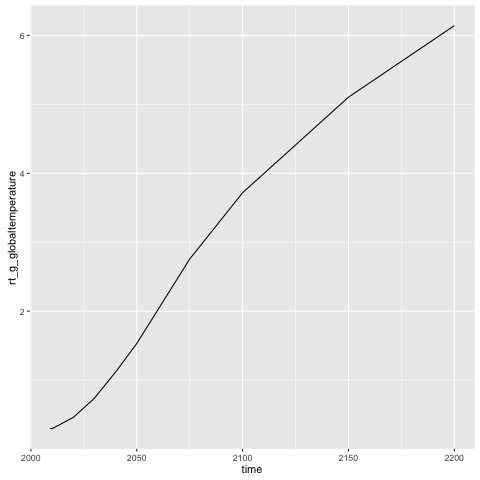

RCall.RObject{RCall.VecSxp}


In [3]:
using RCall
R"library(ggplot2)"
R"ggplot($df, aes(x=time, y=rt_g_globaltemperature)) + geom_line()"